# Recommendation product task

## Load libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling  import ProfileReport

%matplotlib inline

In [51]:
data = pd.read_csv('meta.csv')
sales_cnt = pd.read_csv('sales_cnt.csv')

## EDA

In [52]:
data.head()

,product,status,brand,categories,price,desc,Unnamed: 6,Unnamed: 7
0,15300115,new,sandisk,410 5 8,24990,10.0 100.0 128 Гб Class 10 microSDXC,NaN,NaN
1,15300116,new,silicon power,410 5 8,19990,128 Гб 15.0 75.0 Class 10 microSD,NaN,NaN
2,15300118,new,sony,410 5 8,4990,16 Гб 90.0 90.0 Class 10 microSD,NaN,NaN
3,15300119,new,sony,410 5 8,9490,32 Гб 90.0 90.0 Class 10 microSD,NaN,NaN
4,15300120,new,sony,410 5 8,17990,64 Гб 90.0 90.0 Class 10 microSD,NaN,NaN


In [53]:
sales_cnt.head()

,product,sales
0,1003452,1
1,1003457,4
2,1003458,5
3,1003460,1481
4,1003461,284


In [54]:
data.drop(['Unnamed: 6', 'Unnamed: 7'], axis = 1, inplace = True)

In [55]:
data.head()

,product,status,brand,categories,price,desc
0,15300115,new,sandisk,410 5 8,24990,10.0 100.0 128 Гб Class 10 microSDXC
1,15300116,new,silicon power,410 5 8,19990,128 Гб 15.0 75.0 Class 10 microSD
2,15300118,new,sony,410 5 8,4990,16 Гб 90.0 90.0 Class 10 microSD
3,15300119,new,sony,410 5 8,9490,32 Гб 90.0 90.0 Class 10 microSD
4,15300120,new,sony,410 5 8,17990,64 Гб 90.0 90.0 Class 10 microSD


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
product       300 non-null int64
status        300 non-null object
brand         300 non-null object
categories    300 non-null object
price         300 non-null int64
desc          236 non-null object
dtypes: int64(2), object(4)
memory usage: 14.1+ KB


In [57]:
len(data['product'].unique())

300

In [58]:
len(sales_cnt['product'].unique())

20712

In [59]:
data.head()

,product,status,brand,categories,price,desc
0,15300115,new,sandisk,410 5 8,24990,10.0 100.0 128 Гб Class 10 microSDXC
1,15300116,new,silicon power,410 5 8,19990,128 Гб 15.0 75.0 Class 10 microSD
2,15300118,new,sony,410 5 8,4990,16 Гб 90.0 90.0 Class 10 microSD
3,15300119,new,sony,410 5 8,9490,32 Гб 90.0 90.0 Class 10 microSD
4,15300120,new,sony,410 5 8,17990,64 Гб 90.0 90.0 Class 10 microSD


In [60]:
data = data.merge(sales_cnt, on = 'product', how = 'left')
data['sales'] = data['sales'].fillna(0)

In [61]:
data['sales'] = data['sales'].astype(int)

In [62]:
data.head()

,product,status,brand,categories,price,desc,sales
0,15300115,new,sandisk,410 5 8,24990,10.0 100.0 128 Гб Class 10 microSDXC,1
1,15300116,new,silicon power,410 5 8,19990,128 Гб 15.0 75.0 Class 10 microSD,0
2,15300118,new,sony,410 5 8,4990,16 Гб 90.0 90.0 Class 10 microSD,1
3,15300119,new,sony,410 5 8,9490,32 Гб 90.0 90.0 Class 10 microSD,0
4,15300120,new,sony,410 5 8,17990,64 Гб 90.0 90.0 Class 10 microSD,0


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 7 columns):
product       300 non-null int64
status        300 non-null object
brand         300 non-null object
categories    300 non-null object
price         300 non-null int64
desc          236 non-null object
sales         300 non-null int64
dtypes: int64(3), object(4)
memory usage: 18.8+ KB


In [64]:
data['status'].unique()

array(['new', 'old'], dtype=object)

In [65]:
data['brand'].value_counts()

erlit                          23
dewalt                         13
kingston                       13
bosch                          12
форест деко                    10
ubisoft                        10
hp                             10
jbl                             8
samsung                         8
transcend                       8
анрэкс                          7
nokia                           7
svit mebliv                     6
activision                      6
sony                            6
наша мама                       6
мишутка                         5
nokian                          5
am.pm                           4
katun                           4
electronic arts                 4
epson                           4
bq                              4
xerox                           4
keneksi                         4
sandisk                         4
bridgestone                     3
vertex                          3
xiaomi                          3
sava          

In [66]:
ProfileReport(data)

Number of variables,7
Number of observations,300
Total Missing (%),3.0%
Total size in memory,18.8 KiB
Average record size in memory,64.0 B
Numeric,3
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [67]:
# price normalization
data['price'] = data['price'].apply(lambda x: x / data['price'].max())

In [68]:
data['price']

0      0.037302
1      0.029838
2      0.007448
3      0.014165
4      0.026853
5      0.005215
6      0.010631
7      0.020974
8      0.053694
9      0.050116
10     0.050649
11     0.028241
12     0.016718
13     0.016718
14     0.030301
15     0.028510
16     0.003417
17     0.004293
18     0.003412
19     0.004956
20     0.003267
21     0.020748
22     0.006105
23     0.003418
24     0.000000
25     0.007447
26     0.003865
27     0.007745
28     0.005656
29     0.006347
         ...   
270    0.034033
271    0.000000
272    0.000000
273    0.000000
274    0.000000
275    0.000000
276    0.000000
277    0.000000
278    0.000000
279    0.000000
280    0.000000
281    0.000000
282    0.011308
283    0.008148
284    0.014567
285    0.000000
286    0.000000
287    0.000000
288    0.029107
289    0.000000
290    0.017912
291    0.000000
292    0.000000
293    0.010434
294    0.000000
295    0.000000
296    0.000000
297    0.000000
298    0.000000
299    0.000000
Name: price, Length: 300

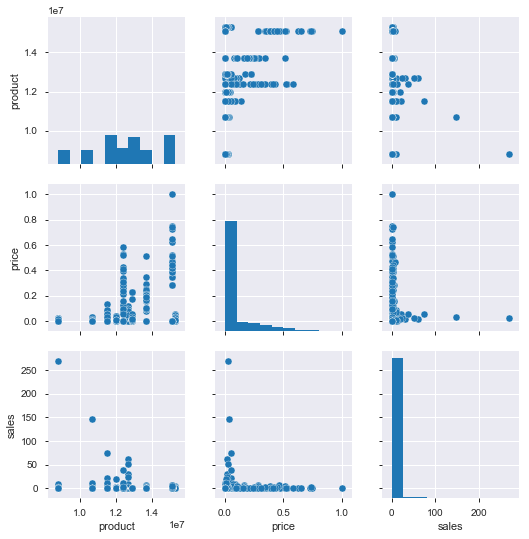

In [70]:
sns.pairplot(data)

In [71]:
data.head(30)

,product,status,brand,categories,price,desc,sales
0,15300115,new,sandisk,410 5 8,0.037302,10.0 100.0 128 Гб Class 10 microSDXC,1
1,15300116,new,silicon power,410 5 8,0.029838,128 Гб 15.0 75.0 Class 10 microSD,0
2,15300118,new,sony,410 5 8,0.007448,16 Гб 90.0 90.0 Class 10 microSD,1
3,15300119,new,sony,410 5 8,0.014165,32 Гб 90.0 90.0 Class 10 microSD,0
4,15300120,new,sony,410 5 8,0.026853,64 Гб 90.0 90.0 Class 10 microSD,0
5,15300122,new,kingston,410 5 8,0.005215,16 Гб 45.0 90.0 Class 10 microSDHC,2
6,15300123,new,kingston,410 5 8,0.010631,32 Гб 45.0 90.0 Class 10 microSD адаптер на SD,0
7,15300124,new,kingston,410 5 8,0.020974,45.0 64 Гб 90.0 Class 10 microSDHC адаптер на SD,0
8,15300125,new,kingston,410 5 8,0.053694,128 Гб 45.0 90.0 microSDXC адаптер на SD,0
9,15300126,new,kingston,410 5 8,0.050116,100.0 128 Гб 80.0 microSDXC адаптер на SD,0


In [73]:
data[60:90]

,product,status,brand,categories,price,desc,sales
60,11500372,new,icutes,150 12 130,0.011777,NaN,0
61,11500253,old,sony,150 12 130,0.000000,10 Вт 20 - 20000 Гц 220.0 46.0 61x61x61 мм вст...,0
62,11500254,new,edifier,150 12 130,0.013462,100 - 20000 Гц 200.0 200x60x33 мм 2x1.20 Вт 40...,2
63,11500255,new,trust,150 12 130,0.006971,100 - 20000 Гц 3 Вт 40.0 8.0 Bluetooth встроен...,0
64,11500256,new,philips,150 12 130,0.022375,107x97x32 мм 210.0 38.0 4 Вт 8.0 Bluetooth вст...,0
65,11500249,new,microlab,150 12 130,0.022254,179x87x102 мм 2x3.50 Вт 370.0 38.0 60 дБ 80 - ...,0
66,11500250,new,philips,150 12 130,0.011926,180.0 2 Вт 63x82x63 мм 8.0 Bluetooth встроенны...,1
67,11500257,old,philips,150 12 130,0.000000,2x6 Вт 38.0 490.0 71x188x70 мм 8.0 mini jack в...,0
68,11500258,new,crown,150 12 130,0.004850,100 - 20000 Гц 3 Вт 6.0 60.0 75 дБ 85x45x85 мм...,5
69,11500259,new,genius,150 12 130,0.003135,2 32.0 8.0 80 - 23000 Гц 80 дБ линейный моно о...,0
